In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling1D, Flatten
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

In [3]:
from keras.datasets import mnist

In [4]:
((xtrain, ytrain), (xtest, ytest)) = mnist.load_data()

In [5]:
xtrain.shape, ytrain.shape, xtest.shape, ytrain.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

In [6]:
xtrain = xtrain.reshape((xtrain.shape[0], 28*28*1))
xtest = xtest.reshape((xtest.shape[0], 28*28*1))

In [7]:
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

In [8]:
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

In [10]:
model = Sequential()
model.add(Dense(128, input_shape=(784, ), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='CategoricalCrossentropy', optimizer=SGD(), metrics=['accuracy'] )

In [14]:
H = model.fit(xtrain, ytrain, validation_data=[xtest, ytest], epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 2.2569 - accuracy: 0.2483 - val_loss: 2.1996 - val_accuracy: 0.4497
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 2.1214 - accuracy: 0.5300 - val_loss: 2.0109 - val_accuracy: 0.6128
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.8577 - accuracy: 0.6281 - val_loss: 1.6643 - val_accuracy: 0.6770
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4888 - accuracy: 0.6815 - val_loss: 1.3030 - val_accuracy: 0.7266
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1817 - accuracy: 0.7299 - val_loss: 1.0501 - val_accuracy: 0.7564
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9740 - accuracy: 0.7668 - val_loss: 0.8834 - val_accuracy: 0.7899
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8343 - accuracy: 0.7956 - val_loss: 0.7678 - val_accuracy: 0.8114
Epoch 

In [20]:
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


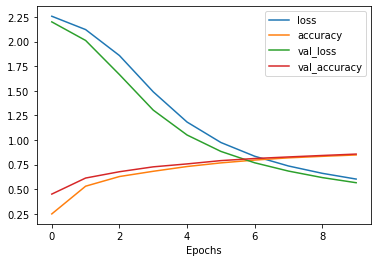

In [21]:
plt.figure()
plt.plot(np.arange(0,10), H.history['loss'], label='loss')
plt.plot(np.arange(0,10), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0,10), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,10), H.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.legend()


In [22]:
pred = model.predict(xtest)

313/313 [==============================] - 1s 1ms/step


In [23]:
print(classification_report(ytest.argmax(axis=1),pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.91      0.97      0.94      1135
           2       0.89      0.82      0.85      1032
           3       0.82      0.85      0.83      1010
           4       0.82      0.87      0.84       982
           5       0.82      0.68      0.74       892
           6       0.88      0.91      0.90       958
           7       0.87      0.88      0.87      1028
           8       0.82      0.79      0.80       974
           9       0.81      0.80      0.80      1009

    accuracy                           0.86     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.86      0.86      0.85     10000

